<a href="https://colab.research.google.com/github/MykhailoMykhailiuk/DS-HW/blob/main/Hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.models import Sequential
from keras.utils import pad_sequences
import pandas as pd

In [38]:
max_features = 10000
max_len = 500
batch_size = 32

In [39]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)

In [40]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

**SimpleRNN**

In [41]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.5468 - loss: 0.6776 - val_accuracy: 0.8012 - val_loss: 0.4437
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.8260 - loss: 0.3953 - val_accuracy: 0.8504 - val_loss: 0.3532
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9072 - loss: 0.2474 - val_accuracy: 0.8544 - val_loss: 0.3547
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9406 - loss: 0.1728 - val_accuracy: 0.8549 - val_loss: 0.3769
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9664 - loss: 0.1088 - val_accuracy: 0.8485 - val_loss: 0.4312


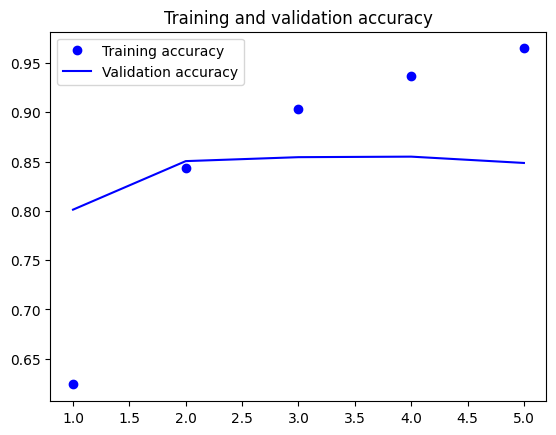

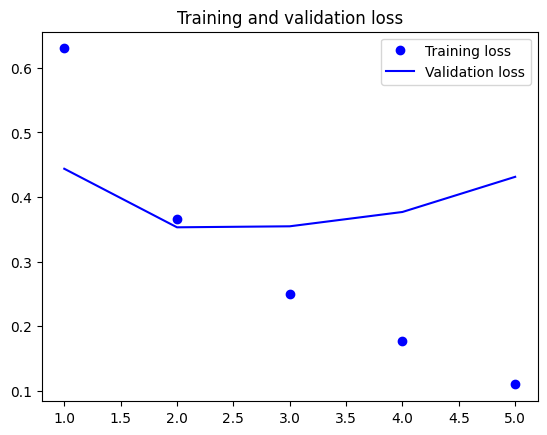

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [44]:
predictions = model.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy}, loss: {loss}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8418 - loss: 0.4561
Accuracy: 0.8423200249671936, loss: 0.44936907291412354


In [45]:
result = pd.DataFrame({'Model': 'SimpleRNN', 'Accuracy': accuracy, 'Loss': loss}, index=[0])

**LSTM**

In [46]:
from keras.layers import LSTM

model = Sequential()

model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5570 - loss: 0.6765 - val_accuracy: 0.7517 - val_loss: 0.5260
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7989 - loss: 0.4471 - val_accuracy: 0.8268 - val_loss: 0.3975
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8592 - loss: 0.3434 - val_accuracy: 0.8636 - val_loss: 0.3297
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8709 - loss: 0.3163 - val_accuracy: 0.8068 - val_loss: 0.4865
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8856 - loss: 0.2881 - val_accuracy: 0.8725 - val_loss: 0.3150


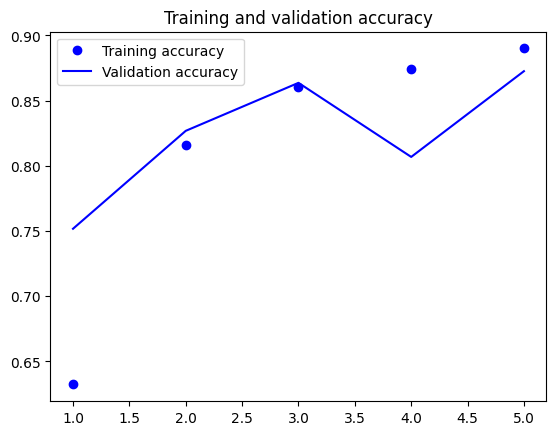

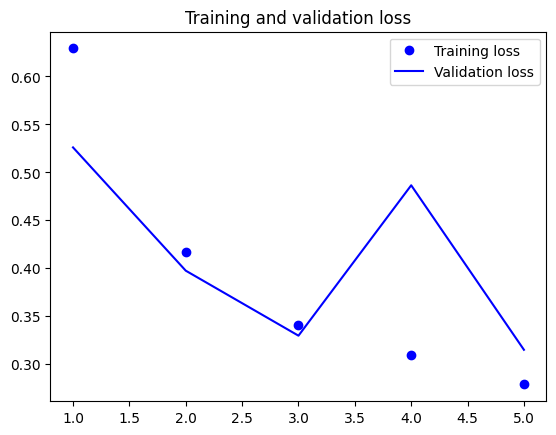

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
predictions = model.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy}, loss: {loss}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8710 - loss: 0.3214
Accuracy: 0.8718400001525879, loss: 0.3162790834903717


In [49]:
new_row = pd.DataFrame({'Model': ['LSTM'], 'Accuracy': [accuracy], 'Loss': [loss]})
result = pd.concat([result, new_row], ignore_index=True)

**BRNN**

In [50]:
from keras.layers import Bidirectional

model = Sequential()

model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5462 - loss: 0.6806 - val_accuracy: 0.6859 - val_loss: 0.5803
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7851 - loss: 0.4813 - val_accuracy: 0.8504 - val_loss: 0.3662
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8484 - loss: 0.3623 - val_accuracy: 0.8663 - val_loss: 0.3268
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8724 - loss: 0.3162 - val_accuracy: 0.8213 - val_loss: 0.4011
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.8924 - loss: 0.2795 - val_accuracy: 0.8199 - val_loss: 0.4259


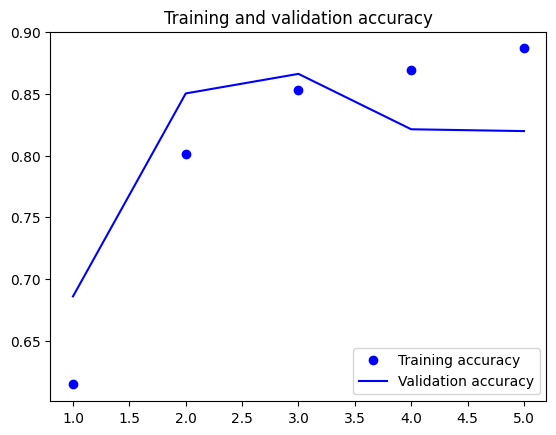

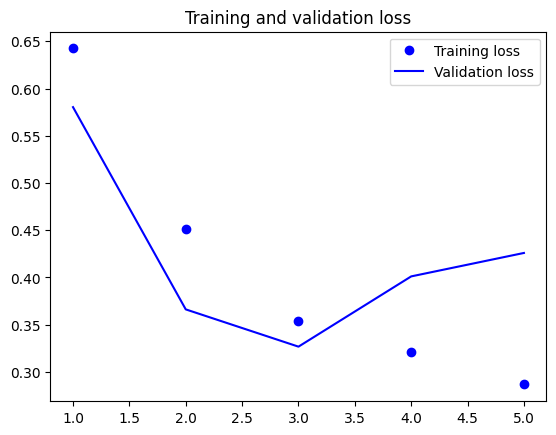

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [52]:
predictions = model.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy}, loss: {loss}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8160 - loss: 0.4356
Accuracy: 0.8176000118255615, loss: 0.4275035858154297


In [53]:
new_row = pd.DataFrame({'Model': ['BRNN'], 'Accuracy': [accuracy], 'Loss': [loss]})
result = pd.concat([result, new_row], ignore_index=True)

**Deep RNN**

In [54]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.5127 - loss: 0.6906 - val_accuracy: 0.7492 - val_loss: 0.5247
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - accuracy: 0.7710 - loss: 0.4965 - val_accuracy: 0.8411 - val_loss: 0.3748
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.8447 - loss: 0.3746 - val_accuracy: 0.8412 - val_loss: 0.3632
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - accuracy: 0.8763 - loss: 0.3084 - val_accuracy: 0.7785 - val_loss: 0.5339
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.8839 - loss: 0.2830 - val_accuracy: 0.8680 - val_loss: 0.3185


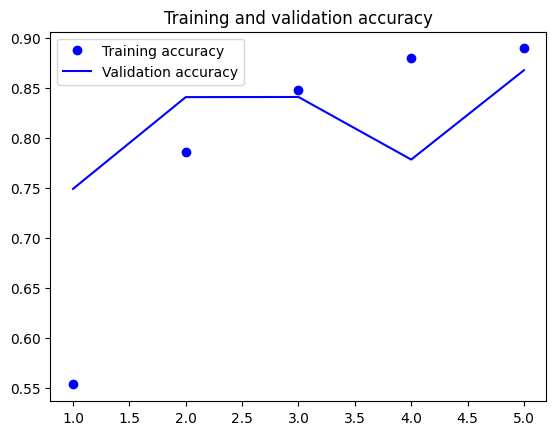

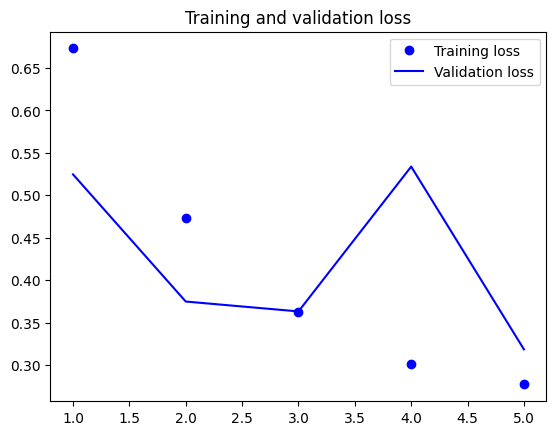

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [56]:
predictions = model.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy}, loss: {loss}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8641 - loss: 0.3245
Accuracy: 0.8685600161552429, loss: 0.3177422881126404


In [57]:
new_row = pd.DataFrame({'Model': ['DRNN'], 'Accuracy': [accuracy], 'Loss': [loss]})
result = pd.concat([result, new_row], ignore_index=True)

In [58]:
result

,Model,Accuracy,Loss
0,SimpleRNN,0.84232,0.449369
1,LSTM,0.87184,0.316279
2,BRNN,0.81760,0.427504
3,DRNN,0.86856,0.317742


**Висновок:**

Моделі LSTM та глибоких RNN показали найкращі результати для цього завдання, так як вони здатні краще захоплювати залежності в послідовності текстових даних. Двостороння RNN не дала значного покращення для цього завдання. SimpleRNN, хоч і показала хороші результати, може бути недостатньо складною для обробки довготривалих залежностей у тексті.